In [1]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [2]:
from simtk.openmm.app import *
from simtk.openmm import *
from simtk.unit import *
from sys import stdout

In [ ]:
pdb = PDBFile('Ala.pdb')
forcefield = ForceField('amber99sb.xml', 'tip3p.xml')
system = forcefield.createSystem(pdb.topology, nonbondedMethod=PME, nonbondedCutoff=1*nanometer, constraints=HBonds)
integrator = LangevinIntegrator(300*kelvin, 1/picosecond, 0.002*picoseconds)
simulation = Simulation(pdb.topology, system, integrator)
simulation.context.setPositions(pdb.positions)
simulation.minimizeEnergy()
simulation.reporters.append(PDBReporter('output.pdb', 1000))
simulation.reporters.append(StateDataReporter(stdout, 1000, step=True, potentialEnergy=True, temperature=True))
simulation.step(10000)

## Analysis

In [3]:
from MDAnalysis import *
import seaborn as sbn
sbn.set_style("white")
sbn.set_context("notebook", font_scale=2, rc={"lines.linewidth": 2.5})


In [6]:
u = Universe('1_ADP/ala.pdb', 'output.dcd')

In [7]:
print u.atoms

<AtomGroup with 2344 atoms>


In [8]:
print u.trajectory

<DCDReader output.dcd with 10 frames of 2344 atoms>


In [9]:
Rgyr = []
protein = u.select_atoms("protein")
for ts in u.trajectory:
    Rgyr.append((u.trajectory.time, protein.radius_of_gyration()))
Rgyr = np.array(Rgyr)

/Users/toni_brain/miniconda3/envs/py2k/lib/python2.7/site-packages/IPython/core/formatters.py:92: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _ipython_display_formatter_default(self):
/Users/toni_brain/miniconda3/envs/py2k/lib/python2.7/site-packages/IPython/core/formatters.py:669: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):


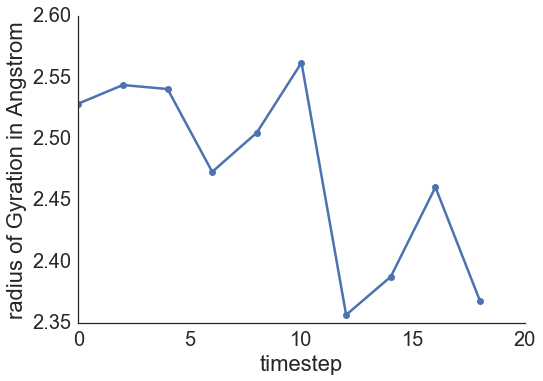

In [10]:
plt.plot(Rgyr[:,0], Rgyr[:,1], marker='o')
plt.xlabel('timestep')
plt.ylabel('radius of Gyration in Angstrom')
sbn.despine()

In [16]:
Simulation.step()

'7.0'